# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [98]:
df = pd.read_csv('/content/MODULO13_PROJETOFINAL_BASE_SUPERMERCADO.csv')
df.sample(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
1020,Toallas higiénicas Nosotras Ultra Invisible ma...,Nosotras,0,1832,2290,458,belleza-y-cuidado-personal
93,Leche en Polvo Ideal Instantánea 900g,Ideal,5189,0,0,0,lacteos
1100,Postre helado chocolate blanco frambuesa 900 ml,Magnum,0,4279,5349,1070,congelados
846,Shampoo liso 600 ml,Vanart,0,2690,0,0,belleza-y-cuidado-personal
50,Pollo asado kg,Cuisine & Co,7485,0,0,0,comidas-preparadas
859,Jabon líquido 700 ml,Elite,0,2099,0,0,belleza-y-cuidado-personal
793,Yoghurt batido light natural endulzado 125 g,Colun,275,0,0,0,lacteos
920,Sopa caracolitos Gourmet 74 g,Gourmet,0,439,0,0,instantaneos-y-sopas
102,Nuggets de pollo Ready 1 kg,Cuisine & Co,4899,0,0,0,congelados
791,Yoghurt batido light frambuesa 125 g,Colun,275,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

## Solução

### Preparo dos dados

In [99]:
# Informações básicas do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           1107 non-null   object
 1   Marca           1107 non-null   object
 2   Preco_Normal    1107 non-null   int64 
 3   Preco_Desconto  1107 non-null   int64 
 4   Preco_Anterior  1107 non-null   int64 
 5   Desconto        1107 non-null   int64 
 6   Categoria       1107 non-null   object
dtypes: int64(4), object(3)
memory usage: 60.7+ KB


In [100]:
# Padroniza colunas textuais para letras minúsculas
colunas_texto = df.select_dtypes(include=['object']).columns

for coluna in colunas_texto:
    df[coluna] = df[coluna].str.lower()

# Padroniza títulos das colunas para letras minúsculas
df.columns = df.columns.str.lower()

df.head()

,title,marca,preco_normal,preco_desconto,preco_anterior,desconto,categoria
0,"pack 12 un, leche extra proteína 1 l",loncoleche,19788,0,0,0,lacteos
1,"pack 12 un, leche chocolate receta original 1 l",soprole,18228,0,0,0,lacteos
2,"pack 12 un, leche semidescremada chocolate 1 l",soprole,18228,0,0,0,lacteos
3,"pack 12 un, leche semidescremada frutilla 1 l",soprole,18228,0,0,0,lacteos
4,"pack 12 un, leche sin lactosa chocolate 1 l",loncoleche,17988,0,0,0,lacteos


In [101]:
# Verifica dados duplicados
df.duplicated().sum()

2

In [102]:
# Remove dados duplicados
df.drop_duplicates(inplace=True)

# Conferência de dados duplicados
df.duplicated().sum()

0

Após a análise inicial, é possível observar que as colunas preco_normal e preco_anterior se referem ao mesmo tipo de informação. Quando uma coluna contém o valor 0, a outra geralmente apresenta valor válido e vice-versa. Porém, existem entradas em que ambas apresentam o valor 0. Como a coluna de preco_normal é relevante para a nossa análise, vamos combinar os dados de ambas as colunas e remover linhas com valor igual a 0.


In [103]:
# Quando preco_normal = 0, preenche com valores de preco_anterior
df['preco_normal'] = df['preco_normal'].mask(df['preco_normal'] == 0, df['preco_anterior'])

df.sample(5)

,title,marca,preco_normal,preco_desconto,preco_anterior,desconto,categoria
4,"pack 12 un, leche sin lactosa chocolate 1 l",loncoleche,17988,0,0,0,lacteos
36,churrascos de asiento 720 g,cuisine & co,9979,0,0,0,congelados
225,"sabanillas con tecnología gel 6 un, 90 x 60 cm...",cotosan,3149,0,0,0,belleza-y-cuidado-personal
679,plátano granel,frutas y verduras propias,645,0,0,0,frutas
1104,shampoo reconstrucción completa 400 ml,dove,3849,2690,3849,1159,belleza-y-cuidado-personal


In [104]:
# Remove dados de preco_normal que sejam iguais a 0
df = df[df['preco_normal'] != 0]

# Seleciona colunas que serão utilizadas
df = df[['marca', 'categoria', 'preco_normal', 'desconto']]

df.sample(5)

,marca,categoria,preco_normal,desconto
299,colun,lacteos,2637,0
1035,savory,congelados,3750,562
221,danone,lacteos,3174,0
779,colun,lacteos,315,0
805,chamyto,lacteos,245,0


In [105]:
# Estatística básica
df.describe()

,preco_normal,desconto
count,930.000000,930.000000
mean,2905.466667,80.373118
std,3014.407634,260.468848
min,209.000000,0.000000
25%,1064.000000,0.000000
50%,2090.000000,0.000000
75%,3590.000000,0.000000
max,19788.000000,4349.000000


### 1 - Traga a média e a mediana dos preços (coluna `preco_normal`) por `categoria` de produto.

Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [106]:
# Cálculo de média de preco_normal por categoria
media_preco = df.groupby('categoria')['preco_normal'].mean()
media_preco

,preco_normal
categoria,
belleza-y-cuidado-personal,2985.207447
comidas-preparadas,3948.300000
congelados,3190.205357
frutas,1724.473684
instantaneos-y-sopas,1179.270270
lacteos,3046.716253
verduras,1457.135593


In [107]:
# Cálculo de mediana de preco_normal por categoria
mediana_preco = df.groupby('categoria')['preco_normal'].median()
mediana_preco

,preco_normal
categoria,
belleza-y-cuidado-personal,2694.5
comidas-preparadas,3890.0
congelados,3029.0
frutas,1195.0
instantaneos-y-sopas,689.0
lacteos,1759.0
verduras,1250.0


In [108]:
# Diferença entre média e mediana
media_preco - mediana_preco

,preco_normal
categoria,
belleza-y-cuidado-personal,290.707447
comidas-preparadas,58.300000
congelados,161.205357
frutas,529.473684
instantaneos-y-sopas,490.270270
lacteos,1287.716253
verduras,207.135593


Em todas as categorias observa-se que a média é maior que a mediana, o que indica uma distribuição assimétrica à direita.

A categoria `comidas-preparadas` apresenta uma diferença entre média e mediana de 58.3, sendo a categoria com menor diferença e sugere uma distribuição mais simétrica.

Por outro lado, a categoria `lacteos` apresenta uma diferença de 1287.7, que é muito superior a outras categorias, indicando possível outlier nos dados.

As categorias `frutas` e `instantaneos-y-sopas` também apresentam diferença elevada, próxima de 500.0.

### 2 - Traga o desvio padrão por `categoria` de produto.


Qual o comportamento da média e mediana nas categorias com maior desvio?

In [109]:
# Cálculo de desvio padrão de preco_normal por categoria
df.groupby('categoria')['preco_normal'].std()

,preco_normal
categoria,
belleza-y-cuidado-personal,1939.140808
comidas-preparadas,1252.842025
congelados,1810.667464
frutas,1639.151114
instantaneos-y-sopas,1276.219431
lacteos,4222.268706
verduras,972.230682


O desvio padrão que se destaca é da categoria de `lacteos`, com 4222.2. Isso corrobora com a elevada diferença entre média e mediana observada. É necessário fazer mais análises para avaliar essa categoria.

O menor desvio padrão foi observado para a categoria de `verduras`, com 972.2. Essa foi uma das categorias que apresentou diferença entre media e mediana próxima de 200.

### 3 - Plote um boxplot da distribuição do `preco_normal` para a `categoria` que você identificou que tem o maior desvio padrão.

Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

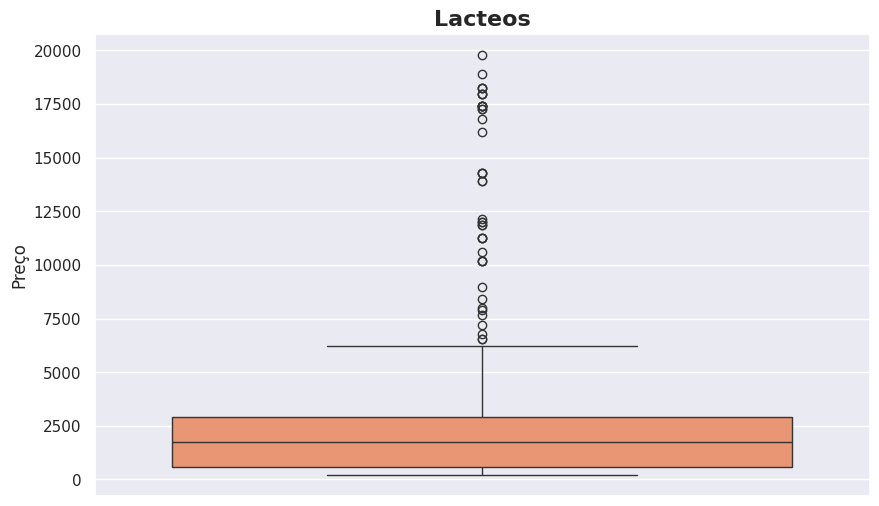

In [110]:
# Box plot da categoria lacteos, que apresentou maior desvio padrão
df_lacteos = df.loc[df['categoria'] == 'lacteos']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_lacteos, y='preco_normal',
            color='#fc8d62', linecolor='#333')
plt.title('Lacteos', fontsize=16, fontweight='bold')
plt.ylabel('Preço')
plt.show()

Com essa visualização é possível confirmar que a categoria possui muitos outliers, o que está de acordo com a análise anterior (desvio padrão e diferença entre média e mediana).

### 4 - Plote um gráfico de barras onde temos a média de `descontos` por `categoria`.

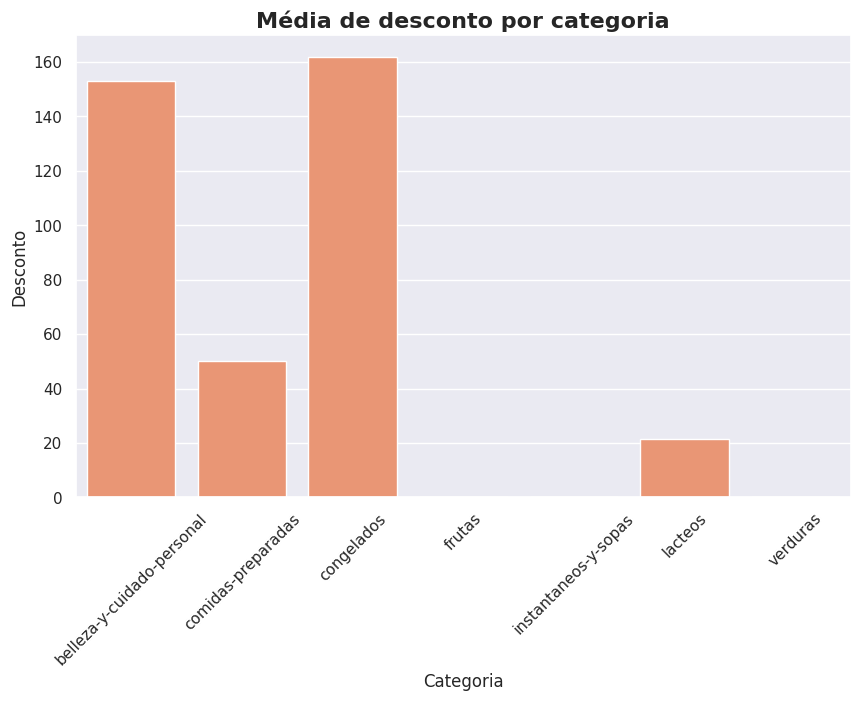

In [111]:
# Cálculo da média de desconto por categoria
media_desconto = df.groupby('categoria')['desconto'].mean()

# Gráfico de barras da média de descontos por categoria
plt.figure(figsize=(10, 6))
sns.barplot(x=media_desconto.index, y=media_desconto, color='#fc8d62')
plt.title('Média de desconto por categoria', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.xlabel('Categoria')
plt.ylabel('Desconto')
plt.show()

Com esse gráfico é possível perceber que as categorias `frutas`, `instantaneos-y-sopas` e `verduras` não possuem desconto.

A categoria de `lacteos` apresentou a menor média de desconto, enquanto as categorias `congelados` e `belleza-y-cuidado-personal	` apresentaram os maiores valores.

### 5 - Plote um gráfico de mapa interativo agrupando os dados por `categoria`, `marca` e trazendo a média de `desconto`.

In [112]:
# Agrupamento da média de desconto por categoria e marca
desconto_agrupado = df.groupby(['categoria', 'marca'])['desconto'].mean().reset_index()

# Gráfico de mapa interativo
fig = px.treemap(desconto_agrupado,
                 path=['categoria', 'marca'],
                 values='desconto',
                 title='Desconto por categoria e marca',
                 color='marca')
# Exibindo o gráfico
fig.show()